# Отток клиентов

**Описание проектной работы**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель проекта**

Необходимо построить модель с предельно большим значением `F1-меры`. Чтобы сдать проект успешно, нужно довести метрику до `0.59`. Дополнительно требуется измерить `AUC-ROC` и сравнить её значение с `F1`-мерой.

# Описание данных

**Признаки:**

   - `RowNumber` — индекс строки в данных;
   - `CustomerId` — уникальный идентификатор клиента;
   - `Surname` — фамилия;
   - `CreditScore` — кредитный рейтинг;
   - `Geography` — страна проживания;
   - `Gender` — пол;
   - `Age` — возраст;
   - `Tenure` — сколько лет человек является клиентом банка;
   - `Balance` — баланс на счёте;
   - `NumOfProducts` — количество продуктов банка, используемых клиентом;
   - `HasCrCard` — наличие кредитной карты;
   - `IsActiveMember` — активность клиента;
   - `EstimatedSalary` — предполагаемая зарплата
   
**Целевой признак:**

   - `Exited` — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Исследование-модели-с-помощью-случайного-леса" data-toc-modified-id="Исследование-модели-с-помощью-случайного-леса-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Исследование модели с помощью случайного леса</a></span></li><li><span><a href="#Исследование-модели-с-помощью-логистической-регрессии" data-toc-modified-id="Исследование-модели-с-помощью-логистической-регрессии-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Исследование модели с помощью логистической регрессии</a></span></li><li><span><a href="#Исследование-модели-с-помощью-CatBoostClassifier" data-toc-modified-id="Исследование-модели-с-помощью-CatBoostClassifier-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Исследование модели с помощью CatBoostClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier-после-Upsampling" data-toc-modified-id="RandomForestClassifier-после-Upsampling-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>RandomForestClassifier после Upsampling</a></span></li><li><span><a href="#CatBoostClassifier-после-Upsampling" data-toc-modified-id="CatBoostClassifier-после-Upsampling-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>CatBoostClassifier после Upsampling</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier-после-Downsampling" data-toc-modified-id="RandomForestClassifier-после-Downsampling-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>RandomForestClassifier после Downsampling</a></span></li><li><span><a href="#CatBoostClassifier-после-Downsampling" data-toc-modified-id="CatBoostClassifier-после-Downsampling-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>CatBoostClassifier после Downsampling</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Изучение общей информации

[Назад к содержанию](#Содержание)

Импортируем необходимые бибилотеки и выполним настройки.

In [1]:
# импорт библиотек:

import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None
pd.set_option('max_columns', None)

RANDOM_STATE = 12345


In [2]:
# чтение исходного датасета:

df = pd.read_csv('/datasets/Churn.csv')
print('Датафрейм сформирован!')

Датафрейм сформирован!


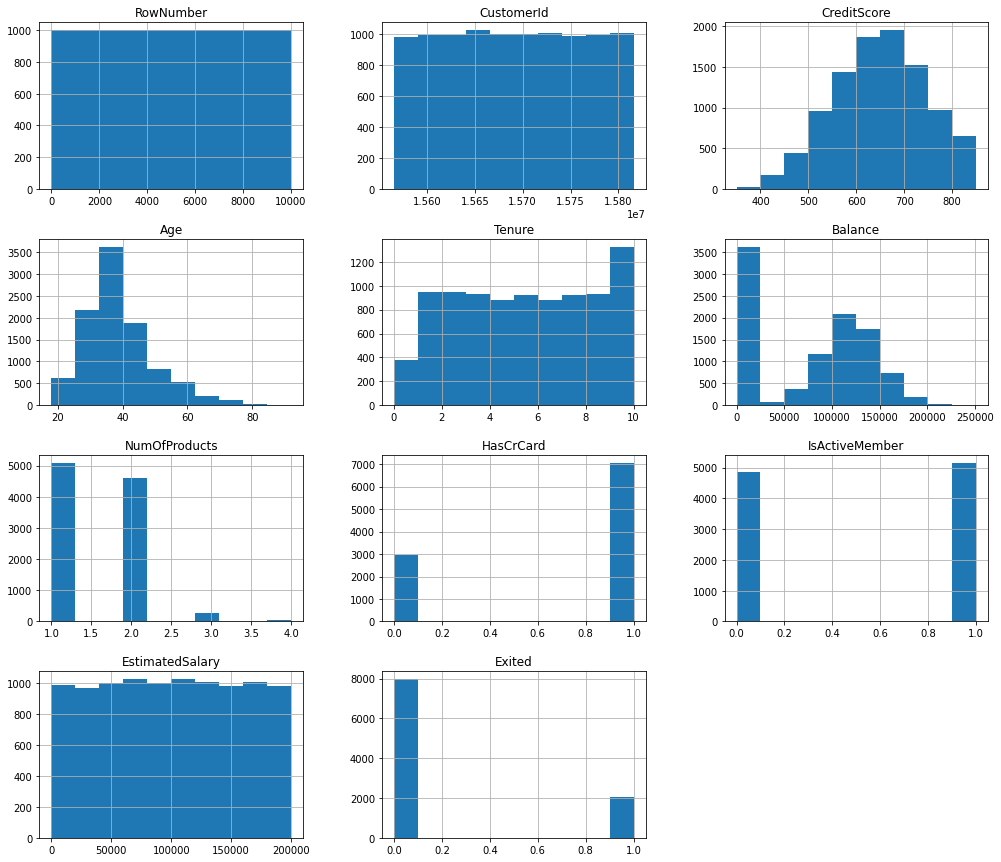

In [3]:
# построим общую гистограмму по датафрейму:

df.hist(figsize=(17, 15));

Из полученных графиков можно сделать первые выводы:

   - дисбаланс классов в целевом столбце `Exited`;
   - в целом данные распределены нормально, ярко-выраженных аномалий не наблюдаем.

In [4]:
# выведем несколько строк датафрейма:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# приведем наименования столбцов к стилю snake_case
# с использованием регулярного выражения:

df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

/tmp/ipykernel_184/1036113465.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]


In [6]:
# проверим, выведем несколько строк:

df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для проведения исследования нам не потребуются признаки `rownumber`, `customerid` и `surname`. Удалим эти столбцы:

In [7]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [8]:
# выведем общую информацию о датафрейме:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Изучим типы данных в столбцах. 

Значения признаков `geography` и `gender` являются типом `object`. Для обучения моделей необходимо преобразовать эти признаки в числовой тип переменных. Выполним замену позже.

In [9]:
# проверка наличия пропусков:

df.isna().sum()

credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [10]:
# подсчитаем процент отсутствующих данных в столбце tenure:

print(round((df.tenure.isna().sum() * 100) / df.shape[0], 2), '%')

9.09 %


`9%` пропусков в столбце `tenure` — сколько лет человек является клиентом банка. 

Выведем несколько строк с пропусками в этом столбце:

In [11]:
df.loc[df['tenure'].isna()].head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


В других столбцах данные есть. По данным видно, что клиенты действительно пользуются услугами банка или уже не являются клиентами банка. Восстановить отсутствующие данные по другим столбца мы не сможем.

Посмотрим подробней на столбец `tenure`. Посмотрим на уникальные значения, содержащиеся в столбце `tenure`, с помощью метода `value_counts()`:

In [12]:
df.tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [13]:
# вывод общей информации о `tenure`:

df.tenure.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

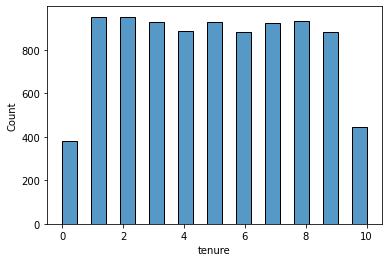

In [14]:
# график принимаемых значений в столбце tenure:

sns.histplot(df, x = df.tenure, multiple = 'stack');

Распределение по годам практически одинаковое, за исключением клиентов, которые пользуются услугами банка менее одного года и более девяти лет. 

Посмотрим как влияет столбец `tenure` на ключевой признак `exited`. Выведем коэффициенты корреляции между этими столбцами.

In [15]:
df[['tenure', 'exited']].corr()

,tenure,exited
tenure,1.000000,-0.016761
exited,-0.016761,1.000000


Корреляционная зависимость отсутствует.

Посмотрим как влияет сколько лет человек является клиентом банка на факт ухода из банка. Построим график.

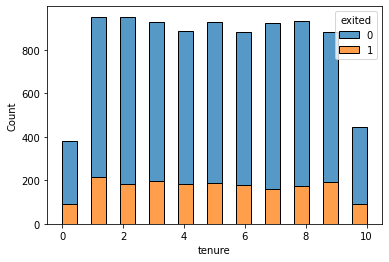

In [16]:
# график зависимости сколько лет человек является клиентом банка и фактом ухода из банка:

sns.histplot(df, x = df.tenure, hue = df.exited, multiple = 'stack');

На основе графика можно сделать вывод о том, что клиенты, которые пользуются услугами банка менее года или более 10 лет, покидают банк реже. Но и таких клиентов меньше всего.

Можно предположить, что отсутствие данных означает, что клиенты пользуются услугами банка менее года. Но если к числу таких клиентов прибавить отсутсвующее количество (909 клиентов), то количество клиентов кто пользуется менее года резко возрастёт на фоне остальных клиентов.

На основе проведённого анализа примем решение - удалим пропущенные данные.  


In [17]:
# удаление пропусков:

df = df.dropna(subset=['tenure']).reset_index(drop=True)

In [18]:
# проверка на наличие пропусков:

df.tenure.isna().sum()

0

Далее выполним поиск дубликатов.

In [19]:
# поиск дубликатов:

df.duplicated().sum()

0

Явные дубликаты отсутствуют.

На основе проделанной работы по подготовке данных, создадим новый `очищенный` датафрейм:

In [20]:
# создание "очищенного" датафрейма:

df_clear = df.copy()

In [21]:
# проверка - вывод нескольких строк "очищенного" датафрейма:

df_clear.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [22]:
# выведем общую информацию о датафрейме df_clear:

df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 781.4+ KB


На этом закончим с изучением общей информации.

**Выводы по изучению общей информации**

   1. Загрузили и преобразовали исходный датасет в датафрейм. Присвоили переменной `df` исходный датафрейм;
   2. Вывели несколько строк датафрейма;
   3. Изучили общую информацию о датафрейме:
      
      - исходный датафрейм состоит из `14` столбцов и `10 000` строк;
      - некоторые столбцы - `RowNumber`, `CustomerId` и `Surname` - не нужны для дальнейшей работы, поэтому исключили их;
      - типы данных в столбцах не требуют преобразования в другие типы и готовы для работы;
      - привели наименования столбцов к нижнему регистру;
      - изменили категориальный признак в столбце genre на числовой;
      - удалили `9%` пропусков в столбце `tenure`;
      - явные дубликаты не обнаружены.
      
     
   4. Описание данных.
   
      **Признаки**:
   
   - `rownumber` — индекс строки в данных - исключили из датафрейма;
   - `customerid` — уникальный идентификатор клиента - исключили из датафрейма;
   - `surname` — фамилия - исключили из датафрейма;
   - `creditscore` — кредитный рейтинг;
   - `geography` — страна проживания;
   - `gender` — пол: 1 - мужской, 0 - женский;
   - `age` — возраст;
   - `tenure` — сколько лет человек является клиентом банка;
   - `balance` — баланс на счёте;
   - `num_of_products` — количество продуктов банка, используемых клиентом;
   - `has_cr_card` — наличие кредитной карты;
   - `is_active_member` — активность клиента;
   - `estimated_salary`— предполагаемая зарплата.
   
       **Целевой признак**:
       

   - `exited` — факт ухода клиента:
   
         - `0` - клиент является пользователем банка;
         - `1` - клиент покинул банк.
      
   5. Создали "очищенный" датафрейм `df_clear`, который будем использовать для дальнейшей работы.

## Исследование задачи

[Назад к содержанию](#Содержание)

### Исследование баланса классов

[Назад к содержанию](#Содержание)

Исследуем дисбаланс классов в целевом признаке `exited` — факт ухода клиента.

Для наглядного представления дисбаланса выведем графики частоты появления положительного и отрицательного признаков в целевом признаке.

0    0.796062
1    0.203938
Name: exited, dtype: float64


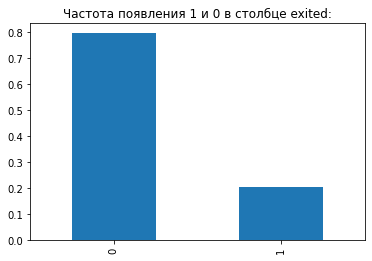

In [23]:
# Частота появления 1 и 0 в столбце exited

class_frequency = df_clear['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', title = 'Частота появления 1 и 0 в столбце exited:');

20% клиентов покинули банк. Виден явный дисбаланс классов в пользу отрицательного класса. Если мы будем всех людей прогнозировать, что они не уйдут из банка, то в 80% случаев мы будем правы. Будем это учитывать при обработке дисбаланса классов.

Далее посмотрим на разброс численных признаков.

In [24]:
# вывод информации о датафрейме с помощью describe():

df_clear.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


На основе таблицы сделаем следующие выводы по разбросу данных по признакам:

   - столбец `creditscore`: разброс от `350` до `850`;
   - столбец `age`: разброс от `18` до `92`;
   - столбец `tenure`: разброс от `0` до `10`;
   - столбец `balance`: разброс от `0` до `250898.09`;
   - столбец `numofproducts`: разброс от `1` до `4`;
   - столбец `estimatedsalary`: разброс от `11.58` до `199992.48`.
   
Видно, что данные разбросаны по-разному. Обучение моделей на этих данных приведет к неверному обучению, т.е. модель будет обладать низкими качественными характеристиками. Для избежания этого будем использовать масштабирование признаков с помощью стандартизации данных. 

**Вывод после исследования баланса классов**
   
Изучили дисбаланс классов. Дисбаланс наблюдается как в целевом, так и в численных признаках. Будем это учитывать в дальнейшем при обучении моделей.

### Разбиение данных на выборки

[Назад к содержанию](#Содержание)

In [25]:
# вывод размера датафрейма df_clear:

df_clear.shape

(9091, 11)

Создадим переменные для признаков и целевого признака:

   - в качестве целевого признака `target` будем использовать значения из столбца `exited` - `0` или `1`;
   - в качестве признаков `features` будем использовать все признаки, за исключением целевого.
   
Пропишем переменные:

In [26]:
# признаки: 
features = df_clear.drop('exited', axis=1)

# целевой признак:
target = df_clear['exited']

Поскольку у нас отсутствует отдельный датасет для тестирования модели, разобьем датафрейм на обучающую, валидационную и тестовую выборки в соотношении `3:1:1`:

   - `60%` под обучающую выборку;
   - `20%` под валидационную выборку;
   - `20%` под тестовую выборку 

В качестве параметра `random_state` примем значение `12345`.

В связи с тем, что наш исходный датасет небольшой, то имеет смысл разделять данные с помощью стратификации. Стратификация позволяет избежать случая когда распределение тренировочного и тестового множеств оказываются не таким, как у всего исходного множества. Т.е. стратификация помогает сохранить соотношение классов, представленное в исходном датасете.

Разделение выборок выполним поэтапно: сперва выделим `60%` под обучающую выборку, оставшиеся `40%` поделим поровну между валидационной и тестовой выборками.


In [27]:
# выделим 60% под обучающую выборку
# применим аргумент stratify  к целевому признаку target:

features_train, features_valid_test, target_train, target_valid_test = \
    train_test_split(features, target, test_size = 0.4, random_state = 12345, stratify = target)

In [28]:
# проверим количество получившихся объектов:

print('features_train:', features_train.shape)
print('features_valid_test:', features_valid_test.shape)
print('target_train:', target_train.shape)
print('target_valid_test:', target_valid_test.shape)


features_train: (5454, 10)
features_valid_test: (3637, 10)
target_train: (5454,)
target_valid_test: (3637,)


`5454` строк под обучающую выборку - это так раз `60%` датафрейма `df_clear`. Оставшиеся `3637` строк - это `40%` датафрейма `df_clear`. Т.е. разбили верно.

Далее оставшиеся `40%` разобъем поровну между валидационной и тестовой выборками.

In [29]:
# выделим по 20% под валидационную и тестовую выборки
# аргумент stratify применим к target_valid_test:

features_valid, features_test, target_valid, target_test = \
    train_test_split(features_valid_test, target_valid_test, \
    test_size = 0.5, random_state = RANDOM_STATE, stratify = target_valid_test) 


In [30]:
# проверим количество получившихся объектов:

print('features_valid:', features_valid.shape)
print('features_test:', features_test.shape)
print('target_valid:', target_valid.shape)
print('target_test:', target_test.shape)


features_valid: (1818, 10)
features_test: (1819, 10)
target_valid: (1818,)
target_test: (1819,)


Под валидационную выборку и тестовую пришлось по `1818` строк - это по `20%` на каждую выборку. Т.е. разбили верно.

Стандартизируем численные признаки. Создадим объект структуры `StandardScaler()` и настроим его на обучающих данных. Создадим переменную `numeric` со списком всех численных признаков. 

In [31]:
# сделаем переменную numeric со списком всех численных признаков:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# создаем объект структуры StandardScaler():
scaler = StandardScaler()

# настройка обучающих данных:
scaler.fit(features_train[numeric])

# преобразование признаковых выборок функцией transform():
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


# проверка
display('features_train:', features_train.head())
print(features_train.shape)
display('features_valid:', features_valid.head())
print(features_valid.shape)
display('features_test:', features_test.head())
print(features_test.shape)

'features_train:'

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
8837,-1.292898,France,Male,-0.660843,0.686341,0.786636,-0.910943,0,0,-0.223548
1090,-1.563714,Spain,Female,0.778434,1.034232,0.833795,-0.910943,1,0,1.383021
7609,1.581914,Spain,Male,0.106771,-0.357331,-1.222967,0.789359,1,1,-0.308331
7279,0.842379,Spain,Female,0.010820,-1.053112,0.807063,-0.910943,1,1,-0.430980
2245,-0.397123,Spain,Female,-1.236554,-0.357331,-1.222967,0.789359,1,1,1.392642


(5454, 10)


'features_valid:'

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
6800,-0.417955,Spain,Female,-0.181084,1.730013,1.023931,0.789359,1,1,0.519901
4950,0.113260,Germany,Male,0.202723,-0.009440,0.738812,0.789359,0,1,0.364920
8287,1.071531,Spain,Male,1.162241,-0.357331,0.054632,0.789359,0,1,-0.545522
8912,-0.845011,Spain,Female,-0.852747,-0.705222,1.010554,-0.910943,1,1,-1.154323
8265,-0.553363,Spain,Male,-0.085132,0.338450,0.629162,0.789359,1,1,-1.296336


(1818, 10)


'features_test:'

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
3726,0.259084,Spain,Male,-0.660843,1.730013,-1.222967,0.789359,1,0,1.597110
4661,1.394426,Germany,Male,-0.085132,-1.401003,0.994334,-0.910943,1,1,1.253399
8400,-0.063812,Spain,Male,0.970338,1.730013,-1.222967,0.789359,1,1,0.789730
6135,0.696555,Spain,Male,-0.277036,-1.053112,0.425659,0.789359,0,1,-0.877030
8853,0.279916,France,Female,-1.332505,-0.705222,-1.222967,0.789359,1,0,1.389657


(1819, 10)


Далее применим `OHE-кодирование` к категориальным признакам.

In [32]:
# список категориальных признаков:
categorical = ['geography', 'gender']

# использование техники OHE к полученным выборкам:

features_train = pd.get_dummies(features_train, columns=categorical, drop_first=True)
features_valid = pd.get_dummies(features_valid, columns=categorical, drop_first=True)
features_test = pd.get_dummies(features_test, columns=categorical, drop_first=True)

In [33]:
# проверим получившиеся выборки, выведем несколько строк каждой:

display('features_train:', features_train.head(3))
print(features_train.shape)
display('features_valid:', features_valid.head(3))
print(features_valid.shape)
display('features_test:', features_test.head(3))
print(features_test.shape)

'features_train:'

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8837,-1.292898,-0.660843,0.686341,0.786636,-0.910943,0,0,-0.223548,0,0,1
1090,-1.563714,0.778434,1.034232,0.833795,-0.910943,1,0,1.383021,0,1,0
7609,1.581914,0.106771,-0.357331,-1.222967,0.789359,1,1,-0.308331,0,1,1


(5454, 11)


'features_valid:'

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
6800,-0.417955,-0.181084,1.730013,1.023931,0.789359,1,1,0.519901,0,1,0
4950,0.113260,0.202723,-0.009440,0.738812,0.789359,0,1,0.364920,1,0,1
8287,1.071531,1.162241,-0.357331,0.054632,0.789359,0,1,-0.545522,0,1,1


(1818, 11)


'features_test:'

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3726,0.259084,-0.660843,1.730013,-1.222967,0.789359,1,0,1.597110,0,1,1
4661,1.394426,-0.085132,-1.401003,0.994334,-0.910943,1,1,1.253399,1,0,1
8400,-0.063812,0.970338,1.730013,-1.222967,0.789359,1,1,0.789730,0,1,1


(1819, 11)


**Вывод после разбиения данных на выборки**

В данном пункте мы стандартизировали численные признаки и разбили "чистый" датафрейм на обучающую, валидационную и тестовую выборки в соотношении `3:1:1`:

   - `60%` выделили под обучающую выборку: `features_train` и `target_train`;
   - `20%` под валидационную выборку: `features_valid` и `target_valid`;
   - `20%` под тестовую выборку: `features_test` и `target_test`. 

### Исследование моделей

[Назад к содержанию](#Содержание)

Целевой признак, который нужно предсказать в нашей задаче, это значение `0` или `1` в столбце `exited`. Поэтому наша задача сводится к бинарной (двоичной) классификации.

Решить задачу можно следующими способами:

   - `решающее дерево`;
   - `случайный лес`;
   - `логистическая регрессия`;
   - `CatBoostClassifier`.
   
Решающее дерево заведомо будет иметь худшие качественные параметры по отношению со случайным лесом, поэтому не будем строить модель методом решающего дерева, а сразу обучим модель с помощью случайного леса.


Подготовим таблицу для сравнения результатов обученных моделей. Сравнивать будем следующие метрики: `F1`, `accuracy` и значение `AUC-ROC`. 

Также добавим для сравнения `precision` и `recall`. В данной задаче особенно важна полнота `recall`:

$$
recall = TP / (TP + FN)
$$

Если модель будет часто предсказывать, что клиент останется, а на самом деле он уйдёт - это значение `FN` - толку от такой модели мало. Поэтому необходимо минимизировать `FN`, тем самым обеспечим повышение `recall`.

In [34]:
# список с наименованиями обученных моделей:
models = []

# список для хранения значений f1:
f1_results = []

# список для хранения accuracy:
accuracy_results = []

# список для хранения значений AUC-ROC:
auc_results = []

# список для хранения precision:
precision_results = []

# список для хранения recall:
recall_results = []

Создадим функцию `roc` для построения `AUC-ROC`-кривых. Строить будем на валидационной выборке. Функция будет строить график AUC-ROC по валидационным данным и возвращать значение `auc-roc`.

In [35]:
# функция для расчета и построения ROC-кривых:

def roc(model, model_name):

    # вероятности положительного класса:
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    # вычисление значений FPR, TPR и рассмотренные пороги:
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

    # построение графика:
    plt.figure()

    plt.plot(fpr, tpr)

    # ROC-кривая случайной модели:
    plt.plot([0, 1], [0, 1], linestyle='--')

    # установка границ осей от 0 до 1:
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # подпись осей "False Positive Rate" и "True Positive Rate":
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # заголовок "ROC-кривая":
    plt.title(f'ROC-кривая для {model_name}:')

    plt.show()
    
    # вывод AUC-ROC значения:
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print(f'AUC-ROC для {model_name}: \n', '  ', auc_roc)
    
    return auc_roc

Создадим функцию `model_quality` для расчета качественных характеристик моделей и сохранения результатов.

In [36]:
# функция для расчета и сохранения метрик качества:

def model_quality(model, model_name):

    # предсказание модели на валидационной выборке:
    predicted_model = model.predict(features_valid)
    
    print(f'Качественные метрики для {model_name}:\n')

    # вычисление f1-меры:
    f1_model = f1_score(target_valid, predicted_model)
    print('F1:', f1_model)

    # вычисление accuracy:
    accuracy_model = model.score(features_valid, target_valid)
    print('Accuracy:', accuracy_model)

    # вычисление precision:
    precision_model = precision_score(target_valid, predicted_model)
    print('Precision:', precision_model)

    # вычисление recall:
    recall_model = recall_score(target_valid, predicted_model)
    print('Recall:', recall_model)

    # расчет и построение AUC-ROC:
    auc_roc = roc(model, model_name)
    print('\n')
    
    # вывод отчёта с основными метриками классификации:
    print(f'Основные метрики классификации для {model_name}:\n', '   ',
        classification_report(target_valid, predicted_model))
    
    # сохранение результатов:
    models.append(model_name)
    f1_results.append(f1_model)
    accuracy_results.append(accuracy_model)    
    auc_results.append(auc_roc)
    precision_results.append(precision_model)
    recall_results.append(recall_model)
    

Ещё создадим функцию вывода наилучших параметров, найденных после `GridSearchCV`.

In [37]:
# функция вывода лучших параметров, 
# найденных после GridSearchCV:

def best_params(model_name, search_model):

    # вывод лучших параметров, найденных после GridSearchCV:
    print(f'Наилучшие найденные параметры для {model_name} после CV:\n', '   ', 
          search_model.best_params_)
    print('Наилучшая метрика F1:\n', '   ', search_model.best_score_)
    print('Среднее значение accuracy:\n', '   ',
        search_model.cv_results_['mean_test_accuracy'].mean())
    print('Среднее значение precision:\n', '   ',
        search_model.cv_results_['mean_test_precision'].mean())
    print('Среднее значение recall:\n', '   ',
        search_model.cv_results_['mean_test_recall'].mean())


#### Исследование модели с помощью случайного леса

[Назад к содержанию](#Содержание)

Обучим модель с помощью случайного леса. Сперва найдём оптимальные гиперпараметры модели с помощью `GridSearchCV`.

In [38]:
%%time

# создаем объект класса RandomForestClassifier:
model_RFC = RandomForestClassifier(random_state=RANDOM_STATE)

# параметры RandomForestClassifier:
params_RFC = {
            'n_estimators': [20, 30, 60, 70, 80],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': range(2, 20),
            'max_depth': [10, 15, 20, 30]
}

# параметры для GridSearchCV:
search_RFC = GridSearchCV(
                model_RFC, 
                params_RFC, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_RFC.fit(features_train, target_train)

CPU times: user 17min 15s, sys: 3.12 s, total: 17min 18s
Wall time: 17min 24s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'min_samples_split': range(2, 20),
                         'n_estimators': [20, 30, 60, 70, 80]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [39]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('RandomForestClassifier', search_RFC)

Наилучшие найденные параметры для RandomForestClassifier после CV:
     {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 30}
Наилучшая метрика F1:
     0.5798792995860058
Среднее значение accuracy:
     0.8584984625389271
Среднее значение precision:
     0.7629820367637172
Среднее значение recall:
     0.4448652632453081


Теперь обучим модель `RandomForestClassifier` с оптимальными гиперпараметрами, найденными после `GridSearchCV`.

In [40]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_RFC = RandomForestClassifier(
                random_state=RANDOM_STATE, 
                criterion=search_RFC.best_params_['criterion'],
                max_depth=search_RFC.best_params_['max_depth'],
                min_samples_split=search_RFC.best_params_['min_samples_split'], 
                n_estimators=search_RFC.best_params_['n_estimators'] 
)

# обучение модели:
model_grid_RFC.fit(features_train, target_train)


CPU times: user 208 ms, sys: 3.95 ms, total: 212 ms
Wall time: 220 ms


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=30, random_state=12345)

Качественные метрики для RandomForestClassifier:

F1: 0.6141215106732348
Accuracy: 0.8707370737073707
Precision: 0.7857142857142857
Recall: 0.5040431266846361


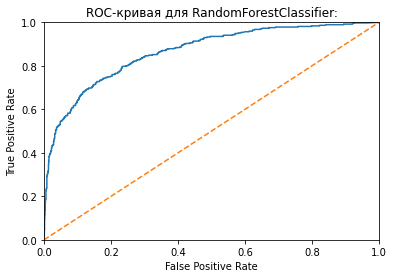

AUC-ROC для RandomForestClassifier: 
    0.8655895551163575


Основные метрики классификации для RandomForestClassifier:
                   precision    recall  f1-score   support

           0       0.88      0.96      0.92      1447
           1       0.79      0.50      0.61       371

    accuracy                           0.87      1818
   macro avg       0.83      0.73      0.77      1818
weighted avg       0.86      0.87      0.86      1818



In [41]:
# вывод и сохранение метрик качества:

model_quality(model_grid_RFC, 'RandomForestClassifier')

#### Исследование модели с помощью логистической регрессии

[Назад к содержанию](#Содержание)

Обучим модель с помощью логистической регрессии. Для поиска оптимальных гиперпараметров модели воспользуемся также поиском по сетке `GridSearchCV`.

In [42]:
%%time

# создаем объект класса LogisticRegression:
model_LR = LogisticRegression(random_state=RANDOM_STATE)

# параметры LogisticRegression:
params_LR = {
            'C': [0.5, 1, 1.5],
            'class_weight': [None, 'balanced'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg'],
            'max_iter': [1000]
}

# параметры для GridSearchCV:
search_LR = GridSearchCV(
                model_LR, 
                params_LR, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_LR.fit(features_train, target_train)

CPU times: user 13.4 s, sys: 13.9 s, total: 27.3 s
Wall time: 27.3 s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=12345), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'max_iter': [1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [43]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('LogisticRegression', search_LR)

Наилучшие найденные параметры для LogisticRegression после CV:
     {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}
Наилучшая метрика F1:
     0.48637920151153613
Среднее значение accuracy:
     0.7563363578009681
Среднее значение precision:
     0.4805652749381078
Среднее значение recall:
     0.43099803839714157


Теперь обучим новую модель с помощью найденных оптимальных гиперпараметров.

In [44]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_LR = LogisticRegression(
            C = search_LR.best_params_['C'],
            class_weight = search_LR.best_params_['class_weight'],
            solver = search_LR.best_params_['solver'],
            max_iter = search_LR.best_params_['max_iter']
)

# обучение модели:
model_grid_LR.fit(features_train, target_train)


CPU times: user 92.3 ms, sys: 120 ms, total: 212 ms
Wall time: 199 ms


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

Качественные метрики для LogisticRegression:

F1: 0.5065420560747663
Accuracy: 0.7095709570957096
Precision: 0.3876967095851216
Recall: 0.7304582210242587


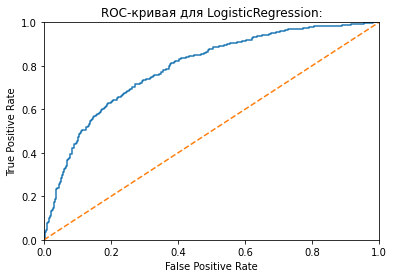

AUC-ROC для LogisticRegression: 
    0.7907521277408226


Основные метрики классификации для LogisticRegression:
                   precision    recall  f1-score   support

           0       0.91      0.70      0.79      1447
           1       0.39      0.73      0.51       371

    accuracy                           0.71      1818
   macro avg       0.65      0.72      0.65      1818
weighted avg       0.80      0.71      0.74      1818



In [45]:
# вывод и сохранение метрик качества:

model_quality(model_grid_LR, 'LogisticRegression')

Как видно, модель, обученная с помощью логистической регрессии, хуже справилась с задачей по сравнению с моделью, обученной с помощью случайного леса. 

#### Исследование модели с помощью CatBoostClassifier

[Назад к содержанию](#Содержание)

Найдём оптимальные гиперпараметры для `CatBoostClassifier` с помощью `GridSearchCV`.

In [46]:
%%time

# создаем объект класса CatBoostClassifier:
model_CAT = CatBoostClassifier( \
            random_state=RANDOM_STATE,
            verbose=False)

# параметры CatBoostClassifier:
params_CAT = {
            'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6], 
            'max_depth': [2, 4, 6],
            'n_estimators': [10, 15, 30, 50]
}

# параметры для GridSearchCV:
search_CAT = GridSearchCV(
                model_CAT, 
                params_CAT, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_CAT.fit(features_train, target_train)

CPU times: user 12.4 s, sys: 880 ms, total: 13.3 s
Wall time: 2min 57s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f148df00070>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [10, 15, 30, 50]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [47]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('CatBoostClassifier', search_CAT)

Наилучшие найденные параметры для CatBoostClassifier после CV:
     {'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 30}
Наилучшая метрика F1:
     0.5913835481533641
Среднее значение accuracy:
     0.8521392824807923
Среднее значение precision:
     0.7786619767221212
Среднее значение recall:
     0.3878036332296421


Теперь обучим новую модель `CatBoostClassifier` с гиперпараметрами, найденными после `GridSearchCV`.

In [48]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_CAT = CatBoostClassifier(
                random_state=RANDOM_STATE,
                verbose=False,
                learning_rate = search_CAT.best_params_['learning_rate'], 
                max_depth = search_CAT.best_params_['max_depth'],
                n_estimators = search_CAT.best_params_['n_estimators']
)

# обучение модели:
model_grid_CAT.fit(features_train, target_train)


CPU times: user 35.7 ms, sys: 8.07 ms, total: 43.8 ms
Wall time: 588 ms


Качественные метрики для CatBoostClassifier:

F1: 0.6123778501628664
Accuracy: 0.8690869086908691
Precision: 0.7736625514403292
Recall: 0.5067385444743935


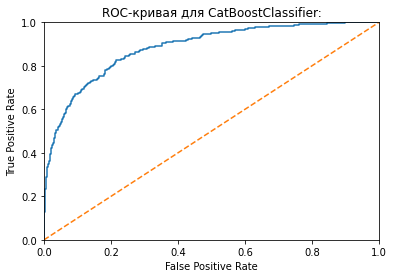

AUC-ROC для CatBoostClassifier: 
    0.8835586965876048


Основные метрики классификации для CatBoostClassifier:
                   precision    recall  f1-score   support

           0       0.88      0.96      0.92      1447
           1       0.77      0.51      0.61       371

    accuracy                           0.87      1818
   macro avg       0.83      0.73      0.77      1818
weighted avg       0.86      0.87      0.86      1818



In [49]:
# вывод и сохранение метрик качества:

model_quality(model_grid_CAT, 'CatBoostClassifier')

In [50]:
# таблица с полученными результатами:
results = (pd.DataFrame({
                        'Model':models,
                        'F1 score':f1_results,
                        'Accuracy':accuracy_results,
                        'AUC-ROC':auc_results,
                        'Precision':precision_results,
                        'Recall':recall_results
                        }).sort_values(by='F1 score', ascending=False).
                              reset_index(drop=True))

# вывод результатов:
results

,Model,F1 score,Accuracy,AUC-ROC,Precision,Recall
0,RandomForestClassifier,0.614122,0.870737,0.865590,0.785714,0.504043
1,CatBoostClassifier,0.612378,0.869087,0.883559,0.773663,0.506739
2,LogisticRegression,0.506542,0.709571,0.790752,0.387697,0.730458


**Вывод после исследования моделей**
   
В данном пункте мы исследовали модели, обученные с помощью `случайного леса`, `логистической регрессии` и `CatBoostClassifier`. Вывели качественные показатели моделей. По искомой метрике `F1` получили две модели с наилучшими параметрами: `RandomForestClassifier` и `CatBoostClassifier`. По метрикам `AUC-ROC` и `Recall` модель, обученная с помощью `CatBoostClassifier`, выигрывает по сравнению с `RandomForestClassifier`. 
   
В связи с чем для дальнейшего исследования оставляем модели, обученные с помощью `RandomForestClassifier` и `CatBoostClassifier` в качестве наилучших моделей. `LogisticRegression` в нашем случае будет в качестве бейзлайн модели.

## Борьба с дисбалансом

[Назад к содержанию](#Содержание)

### Upsampling

При исследовании баланса классов было выявлен дисбаланс в целевом признаке.

Еще раз выведем график частоты появления положительного и отрицательного признаков в столбце `exited`.

0    0.796062
1    0.203938
Name: exited, dtype: float64


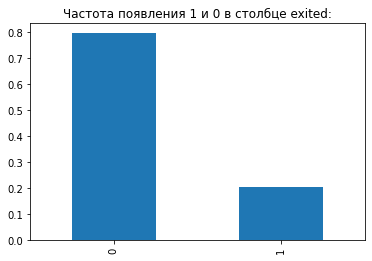

In [51]:
# Частота появления 1 и 0 в столбце exited

class_frequency = df_clear['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot( \
        kind='bar', 
        title = 'Частота появления 1 и 0 в столбце exited:');

In [52]:
# отношение количества строк с 0 к 1:
print(len(df_clear.loc[df_clear['exited'] == 0]) / 
      len(df_clear.loc[df_clear['exited'] == 1]))


3.9034519956850056


`0` в столбце `exited` почти в `4` раза чаще появляется чем `1`. Для борьбы с дисбалансом применим методы `upsampling` и `downsampling`.

Сперва применим `upsampling`.

Для чего создадим соответствующую функцию `upsample`, которая разделит выборку на отрицательные и положительные объекты. Для чего объявим четыре переменные и запишем в них:

   - `features_zeros` — признаки объектов с ответом `0`;
   - `features_ones` — признаки объектов с ответом `1`;
   - `target_zeros` — целевой признак объектов, у которых ответы только `0`;
   - `target_ones` — целевой признак объектов, у которых ответы только `1`.
   
Далее функция продублирует объекты положительного класса четыре раза и объединим их с объектами отрицательного класса. Затем перемешаем данные.

In [53]:
# создадим функцию upsample:

def upsample(features_for_ups, target_for_ups, repeat):
    features_zeros = features_for_ups[target_for_ups == 0]
    features_ones = features_for_ups[target_for_ups == 1]
    target_zeros = target_for_ups[target_for_ups == 0]
    target_ones = target_for_ups[target_for_ups == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # добавление перемешивания:
    features_upsampled, target_upsampled = shuffle( \
                    features_upsampled, 
                    target_upsampled, 
                    random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

In [54]:
# апсемблинг для обучающей выборки:
features_train_upsampled, target_train_upsampled = \
        upsample(features_train, target_train, 4)

print('features_train_upsampled:', features_train_upsampled.shape)
print('target_train_upsampled', target_train_upsampled.shape)

features_train_upsampled: (8790, 11)
target_train_upsampled (8790,)


Проверим как отработала функция `upsample`.

In [55]:
# Частота появления 1 и 0 в целевом столбце
# обучающей выборки после upsambling:

class_frequency_train_upsmbl = target_train_upsampled.value_counts(normalize=True)

print('Соотношение 1 и 0 на тренировочной выборке: \n', class_frequency_train_upsmbl, '\n')
print('Количество 1 и 0 на тренировочной выборке: \n', target_train_upsampled.value_counts(), '\n')

Соотношение 1 и 0 на тренировочной выборке: 
 1    0.50603
0    0.49397
Name: exited, dtype: float64 

Количество 1 и 0 на тренировочной выборке: 
 1    4448
0    4342
Name: exited, dtype: int64 



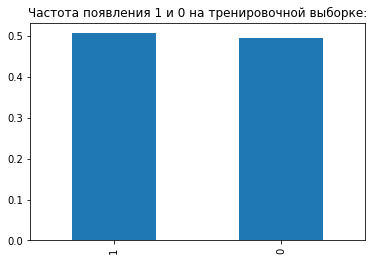

In [56]:
# Частота появления 1 и 0 в целевом столбце
# обучающей выборки после upsambling:

class_frequency_train_upsmbl.plot( \
        kind='bar', 
        title = 'Частота появления 1 и 0 на тренировочной выборке:');

Как видно теперь отсутсвует дисбаланс классов в целевом признаке.

Теперь заново обучим наилучшие модели - `RandomForestClassifier` и `CatBoostClassifier`.

#### RandomForestClassifier после Upsampling

[Назад к содержанию](#Содержание)

Найдём оптимальные гиперпараметры модели с помощью `GridSearchCV`.

In [57]:
%%time

# создаем объект класса RandomForestClassifier:
model_upsampled_RFC = RandomForestClassifier(random_state=RANDOM_STATE)

# параметры RandomForestClassifier:
params_upsampled_RFC = {
            'n_estimators': [20, 30, 60, 70, 80],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': range(2, 20),
            'max_depth': [10, 15, 20, 30]
}

# параметры для GridSearchCV:
search_upsampled_RFC = GridSearchCV(
                model_upsampled_RFC, 
                params_upsampled_RFC, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_upsampled_RFC.fit(features_train_upsampled, target_train_upsampled)

CPU times: user 24min 5s, sys: 2.99 s, total: 24min 8s
Wall time: 24min 12s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'min_samples_split': range(2, 20),
                         'n_estimators': [20, 30, 60, 70, 80]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [58]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('RandomForestClassifier_upsampled', search_upsampled_RFC)

Наилучшие найденные параметры для RandomForestClassifier_upsampled после CV:
     {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 20}
Наилучшая метрика F1:
     0.9588494114202326
Среднее значение accuracy:
     0.9046367399823031
Среднее значение precision:
     0.8846973876326442
Среднее значение recall:
     0.9322413325441061


Значение `F1` близко к единице. Похоже на переобучение модели.

Теперь обучим модель `RandomForestClassifier` с оптимальными гиперпараметрами, найденными после `GridSearchCV`.

In [59]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_upsampled_RFC = RandomForestClassifier(
                random_state=RANDOM_STATE, 
                criterion=search_upsampled_RFC.best_params_['criterion'],
                max_depth=search_upsampled_RFC.best_params_['max_depth'],
                min_samples_split=search_upsampled_RFC.best_params_['min_samples_split'], 
                n_estimators=search_upsampled_RFC.best_params_['n_estimators'] 
)

# обучение модели:
model_grid_upsampled_RFC.fit(features_train_upsampled, target_train_upsampled)


CPU times: user 195 ms, sys: 3.95 ms, total: 198 ms
Wall time: 197 ms


RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=20,
                       random_state=12345)

Качественные метрики для RandomForestClassifier_upsampled:

F1: 0.593144560357675
Accuracy: 0.8498349834983498
Precision: 0.6633333333333333
Recall: 0.5363881401617251


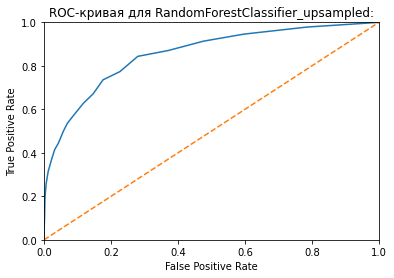

AUC-ROC для RandomForestClassifier_upsampled: 
    0.8544455765902872


Основные метрики классификации для RandomForestClassifier_upsampled:
                   precision    recall  f1-score   support

           0       0.89      0.93      0.91      1447
           1       0.66      0.54      0.59       371

    accuracy                           0.85      1818
   macro avg       0.78      0.73      0.75      1818
weighted avg       0.84      0.85      0.84      1818



In [60]:
# вывод и сохранение метрик качества:

model_quality(model_grid_upsampled_RFC, 'RandomForestClassifier_upsampled')

После переобучения метрика `F1` сильно просела. Похоже модель действительно переобучилась.

#### CatBoostClassifier после Upsampling

[Назад к содержанию](#Содержание)

Найдём оптимальные гиперпараметры модели с помощью `GridSearchCV`.

In [61]:
%%time

# создаем объект класса CatBoostClassifier:
model_upsampled_CAT = CatBoostClassifier( \
            random_state=RANDOM_STATE,
            verbose=False)

# параметры CatBoostClassifier:
params_upsampled_CAT = {
            'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6], 
            'max_depth': [2, 4, 6],
            'n_estimators': [10, 15, 30, 50]
}

# параметры для GridSearchCV:
search_upsampled_CAT = GridSearchCV(
                model_upsampled_CAT, 
                params_upsampled_CAT, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_upsampled_CAT.fit(features_train_upsampled, target_train_upsampled)

CPU times: user 15.6 s, sys: 1 s, total: 16.6 s
Wall time: 3min 2s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f148df99760>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [10, 15, 30, 50]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [62]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params(CatBoostClassifier, search_upsampled_CAT)

Наилучшие найденные параметры для <class 'catboost.core.CatBoostClassifier'> после CV:
     {'learning_rate': 0.6, 'max_depth': 6, 'n_estimators': 50}
Наилучшая метрика F1:
     0.83913497455717
Среднее значение accuracy:
     0.776296928327645
Среднее значение precision:
     0.7947839559801342
Среднее значение recall:
     0.7519085830563313


`F1` также заметно вырасло. Возможно снова столкнулись с переобучением модели.

Теперь обучим новую модель `CatBoostClassifier` с гиперпараметрами, найденными после `GridSearchCV` на тренировочных данных после применения метода `upsampling`.

In [63]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_upsampled_CAT = CatBoostClassifier(
                random_state=RANDOM_STATE,
                verbose=False,
                learning_rate = search_upsampled_CAT.best_params_['learning_rate'], 
                max_depth = search_upsampled_CAT.best_params_['max_depth'],
                n_estimators = search_upsampled_CAT.best_params_['n_estimators']
)

# обучение модели на тренировочной выборке после upsampling:
model_upsampled_CAT.fit(features_train_upsampled, target_train_upsampled)


CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 696 ms


Качественные метрики для CatBoostClassifier_upsampled:

F1: 0.6070640176600441
Accuracy: 0.8041804180418042
Precision: 0.514018691588785
Recall: 0.7412398921832885


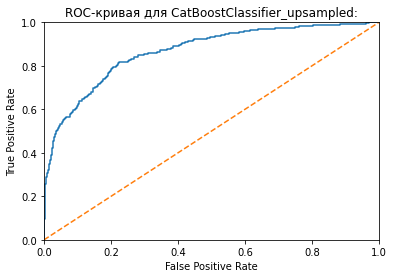

AUC-ROC для CatBoostClassifier_upsampled: 
    0.8669428522996739


Основные метрики классификации для CatBoostClassifier_upsampled:
                   precision    recall  f1-score   support

           0       0.93      0.82      0.87      1447
           1       0.51      0.74      0.61       371

    accuracy                           0.80      1818
   macro avg       0.72      0.78      0.74      1818
weighted avg       0.84      0.80      0.82      1818



In [64]:
# вывод и сохранение метрик качества:

model_quality(model_upsampled_CAT, 'CatBoostClassifier_upsampled')

Метрика `F1` сильно просела на валидационной выборке. Похоже, что модель всё-таки сильно переобучилась.

In [65]:
# таблица с полученными результатами:
results = (pd.DataFrame({
                        'Model':models,
                        'F1 score':f1_results,
                        'Accuracy':accuracy_results,
                        'AUC-ROC':auc_results,
                        'Precision':precision_results,
                        'Recall':recall_results
                        }).sort_values(by='F1 score', ascending=False).
                              reset_index(drop=True))

# вывод результатов:
results

,Model,F1 score,Accuracy,AUC-ROC,Precision,Recall
0,RandomForestClassifier,0.614122,0.870737,0.865590,0.785714,0.504043
1,CatBoostClassifier,0.612378,0.869087,0.883559,0.773663,0.506739
2,CatBoostClassifier_upsampled,0.607064,0.804180,0.866943,0.514019,0.741240
3,RandomForestClassifier_upsampled,0.593145,0.849835,0.854446,0.663333,0.536388
4,LogisticRegression,0.506542,0.709571,0.790752,0.387697,0.730458


`Upsampling` не улучшил качественные метрики моделей. При обучении метрика `F1` резко увеличивалась, но на валидационных данных также резко проседала. Похоже на переобучение моделей.

Далее применим метод `Downsampling`.

### Downsampling

[Назад к содержанию](#Содержание)

Теперь применим метод `downsampling` - уменьшим в 4 раза количество объектов отрицательного класса (`0`).

Напишем функцию `downsample`, которая аналогичным образом разделит выборку на отрицательные и положительные объекты. Для чего объявим четыре переменные и запишем в них:

   - `features_zeros` — признаки объектов с ответом `0`;
   - `features_ones` — признаки объектов с ответом `1`;
   - `target_zeros` — целевой признак объектов, у которых ответы только `0`;
   - `target_ones` — целевой признак объектов, у которых ответы только `1`.
   
Далее функция уменьшит выборку в 4 раза и перемешает данные.

In [66]:
# создадим функцию downsample:

def downsample(features_for_down, target_for_down, repeat):
    features_zeros = features_for_down[target_for_down == 0]
    features_ones = features_for_down[target_for_down == 1]
    target_zeros = target_for_down[target_for_down == 0]
    target_ones = target_for_down[target_for_down == 1] 
    
    features_downsampled = pd.concat( \
        [features_zeros.sample(frac=repeat, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat( \
        [target_zeros.sample(frac=repeat, random_state=RANDOM_STATE)] + [target_ones])
    
    
    # добавление перемешивания:
    features_downsampled, target_downsampled = shuffle( \
                    features_downsampled, 
                    target_downsampled, 
                    random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

In [67]:
# даунсемблинг для обучающей выборки:
features_train_downsample, target_train_downsample = \
        downsample(features_train, target_train, 0.25)

print('features_train_downsample:', features_train_downsample.shape)
print('target_train_downsample', target_train_downsample.shape)

features_train_downsample: (2198, 11)
target_train_downsample (2198,)


Проверим как отработала функция `downsample`.

In [68]:
# Частота появления 1 и 0 в целевом столбце
# обучающей выборки после downsample:

class_frequency_train_downsmbl = target_train_downsample.value_counts(normalize=True)

print('Соотношение 1 и 0 на тренировочной выборке: \n', class_frequency_train_downsmbl, '\n')
print('Количество 1 и 0 на тренировочной выборке: \n', target_train_downsample.value_counts(), '\n')

Соотношение 1 и 0 на тренировочной выборке: 
 1    0.505914
0    0.494086
Name: exited, dtype: float64 

Количество 1 и 0 на тренировочной выборке: 
 1    1112
0    1086
Name: exited, dtype: int64 



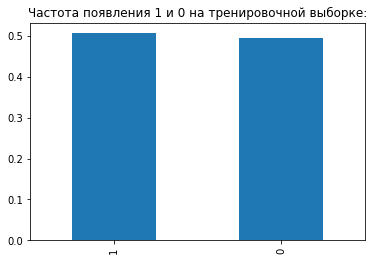

In [69]:
# Частота появления 1 и 0 в целевом столбце
# обучающей выборки после downsample:

class_frequency_train_downsmbl.plot( \
        kind='bar', 
        title = 'Частота появления 1 и 0 на тренировочной выборке:');

Как видно теперь отсутсвует дисбаланс классов в целевом признаке.

Теперь заново обучим наилучшие модели - `RandomForestClassifier` и `CatBoostClassifier`.

#### RandomForestClassifier после Downsampling

[Назад к содержанию](#Содержание)

Найдём оптимальные гиперпараметры модели с помощью `GridSearchCV`.

In [70]:
%%time

# создаем объект класса RandomForestClassifier:
model_downsampled_RFC = RandomForestClassifier(random_state=RANDOM_STATE)

# параметры RandomForestClassifier:
params_downsampled_RFC = {
            'n_estimators': [20, 30, 60, 70, 80],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': range(2, 20),
            'max_depth': [10, 15, 20, 30]
}

# параметры для GridSearchCV:
search_downsampled_RFC = GridSearchCV(
                model_downsampled_RFC, 
                params_downsampled_RFC, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_downsampled_RFC.fit(features_train_downsample, target_train_downsample)

CPU times: user 9min 1s, sys: 2.17 s, total: 9min 4s
Wall time: 9min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'min_samples_split': range(2, 20),
                         'n_estimators': [20, 30, 60, 70, 80]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [71]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('RandomForestClassifier_downsampled', search_downsampled_RFC)

Наилучшие найденные параметры для RandomForestClassifier_downsampled после CV:
     {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 17, 'n_estimators': 80}
Наилучшая метрика F1:
     0.7786365824952484
Среднее значение accuracy:
     0.7690944683164216
Среднее значение precision:
     0.7832728193395381
Среднее значение recall:
     0.7515357173316815


Теперь обучим модель `RandomForestClassifier` с оптимальными гиперпараметрами, найденными после `GridSearchCV` на тренировочных данных после применения метода `downsampling`.

In [72]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_downsampled_RFC = RandomForestClassifier(
                random_state=RANDOM_STATE, 
                criterion=search_downsampled_RFC.best_params_['criterion'],
                max_depth=search_downsampled_RFC.best_params_['max_depth'],
                min_samples_split=search_downsampled_RFC.best_params_['min_samples_split'], 
                n_estimators=search_downsampled_RFC.best_params_['n_estimators'] 
)

# обучение модели:
model_grid_downsampled_RFC.fit(features_train_downsample, target_train_downsample)

CPU times: user 244 ms, sys: 0 ns, total: 244 ms
Wall time: 245 ms


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=17,
                       n_estimators=80, random_state=12345)

Качественные метрики для RandomForestClassifier_downsampled:

F1: 0.6047966631908238
Accuracy: 0.7915291529152916
Precision: 0.4931972789115646
Recall: 0.7816711590296496


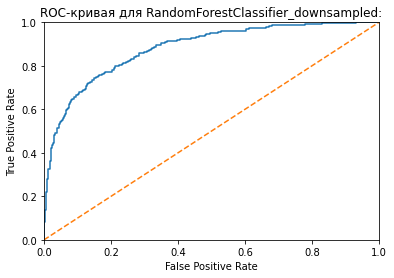

AUC-ROC для RandomForestClassifier_downsampled: 
    0.8802634691722068


Основные метрики классификации для RandomForestClassifier_downsampled:
                   precision    recall  f1-score   support

           0       0.93      0.79      0.86      1447
           1       0.49      0.78      0.60       371

    accuracy                           0.79      1818
   macro avg       0.71      0.79      0.73      1818
weighted avg       0.84      0.79      0.81      1818



In [73]:
# вывод и сохранение метрик качества:

model_quality(model_grid_downsampled_RFC, 'RandomForestClassifier_downsampled')

#### CatBoostClassifier после Downsampling

[Назад к содержанию](#Содержание)

Найдём оптимальные гиперпараметры модели с помощью `GridSearchCV`.

In [74]:
%%time

# создаем объект класса CatBoostClassifier:
model_downsampled_CAT = CatBoostClassifier( \
            random_state=RANDOM_STATE,
            verbose=False)

# параметры CatBoostClassifier:
params_downsampled_CAT = {
            'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6], 
            'max_depth': [2, 4, 6],
            'n_estimators': [10, 15, 30, 50]
}

# параметры для GridSearchCV:
search_downsampled_CAT = GridSearchCV(
                model_downsampled_CAT, 
                params_downsampled_CAT, 
                cv=5,
                scoring={'f1', 'accuracy', 'precision', 'recall'},
                refit='f1',
                n_jobs=-1, 
                verbose=0
)

# обучение модели с помощью кросс-валидации:
search_downsampled_CAT.fit(features_train_downsample, target_train_downsample)

CPU times: user 9.56 s, sys: 790 ms, total: 10.4 s
Wall time: 2min 54s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f148e098e80>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.6],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [10, 15, 30, 50]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [75]:
# вывод лучших параметров, найденных после GridSearchCV:

best_params('CatBoostClassifier_downsampled', search_downsampled_CAT)

Наилучшие найденные параметры для CatBoostClassifier_downsampled после CV:
     {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
Наилучшая метрика F1:
     0.7807936668140838
Среднее значение accuracy:
     0.7619721992130876
Среднее значение precision:
     0.7817966098671021
Среднее значение recall:
     0.7344169730268385


Снова можно отметить резкий рост `F1`. 

Теперь обучим новую модель `CatBoostClassifier` с гиперпараметрами, найденными после `GridSearchCV` на тренировочных данных после применения метода `downsampling`.

In [76]:
%%time

# создание модели с оптимальными гиперпараметрами:
model_grid_downsampled_CAT = CatBoostClassifier(
                random_state=RANDOM_STATE,
                verbose=False,
                learning_rate = search_downsampled_CAT.best_params_['learning_rate'], 
                max_depth = search_downsampled_CAT.best_params_['max_depth'],
                n_estimators = search_downsampled_CAT.best_params_['n_estimators'] 
)

# обучение модели:
model_grid_downsampled_CAT.fit(features_train_downsample, target_train_downsample)

CPU times: user 77.6 ms, sys: 115 µs, total: 77.7 ms
Wall time: 965 ms


Качественные метрики для CatBoostClassifier_downsampled:

F1: 0.6120331950207469
Accuracy: 0.7942794279427943
Precision: 0.4974704890387858
Recall: 0.7951482479784366


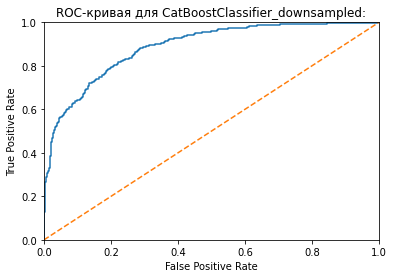

AUC-ROC для CatBoostClassifier_downsampled: 
    0.8868837282080035


Основные метрики классификации для CatBoostClassifier_downsampled:
                   precision    recall  f1-score   support

           0       0.94      0.79      0.86      1447
           1       0.50      0.80      0.61       371

    accuracy                           0.79      1818
   macro avg       0.72      0.79      0.74      1818
weighted avg       0.85      0.79      0.81      1818



In [77]:
# вывод и сохранение метрик качества:

model_quality(model_grid_downsampled_CAT, 'CatBoostClassifier_downsampled')

Метрика `F1` также сильно просела на валидационной выборке. Похоже, что модель всё-таки сильно переобучилась.

In [78]:
# таблица с полученными результатами:
results = (pd.DataFrame({
                        'Model':models,
                        'F1 score':f1_results,
                        'Accuracy':accuracy_results,
                        'AUC-ROC':auc_results,
                        'Precision':precision_results,
                        'Recall':recall_results
                        }).sort_values(by='F1 score', ascending=False).
                              reset_index(drop=True))

# вывод результатов:
results

,Model,F1 score,Accuracy,AUC-ROC,Precision,Recall
0,RandomForestClassifier,0.614122,0.870737,0.865590,0.785714,0.504043
1,CatBoostClassifier,0.612378,0.869087,0.883559,0.773663,0.506739
2,CatBoostClassifier_downsampled,0.612033,0.794279,0.886884,0.497470,0.795148
3,CatBoostClassifier_upsampled,0.607064,0.804180,0.866943,0.514019,0.741240
4,RandomForestClassifier_downsampled,0.604797,0.791529,0.880263,0.493197,0.781671
5,RandomForestClassifier_upsampled,0.593145,0.849835,0.854446,0.663333,0.536388
6,LogisticRegression,0.506542,0.709571,0.790752,0.387697,0.730458


**Вывод после борьбы с дисбалансом**

Используемые техники `upsampling` и `downsampling` заметно не улучшили качество моделей. При обучении метрика `F1` сильно возрастала, но при тестировании на валидационной выборке также сильно падала, что может говорить о переобучении моделей.

Исходя из таблицы с полученными качественными метриками обученных моделей, `примем в качестве наилучшей модели` модель, обученную с помощью `CatBoostClassifier`, не смотря на не самую высокую метрику `F1`. Было принято такое решение из-за метрик `AUC-ROC` и `recall` - в начале проекта была отмечена особенная важность полноты `recall`.

## Тестирование модели

[Назад к содержанию](#Содержание)

Протестируем выбранную модель в качестве наилучшей - `CatBoostClassifier`.

Качественные метрики для наилучшей модели CatBoostClassifier:

F1: 0.6013071895424836
Accuracy: 0.8658603628367235
Precision: 0.7634854771784232
Recall: 0.49595687331536387


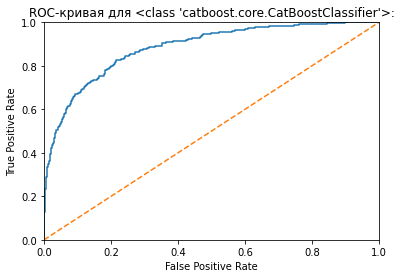

AUC-ROC для <class 'catboost.core.CatBoostClassifier'>: 
    0.8835586965876048


Основные метрики классификации наилучшей модели:
                   precision    recall  f1-score   support

           0       0.88      0.96      0.92      1448
           1       0.76      0.50      0.60       371

    accuracy                           0.87      1819
   macro avg       0.82      0.73      0.76      1819
weighted avg       0.86      0.87      0.85      1819



In [79]:
# предсказания модели по тестовым данным:
predicted_test_CAT = model_grid_CAT.predict(features_test)

print('Качественные метрики для наилучшей модели CatBoostClassifier:\n')

# вычисление f1-меры:
f1_best_model = f1_score(target_test, predicted_test_CAT)
print('F1:', f1_best_model)

# вычисление accuracy:
accuracy_best_model = model_grid_CAT.score(features_test, target_test)
print('Accuracy:', accuracy_best_model)

# вычисление precision:
precision_best_model = precision_score(target_test, predicted_test_CAT)
print('Precision:', precision_best_model)

# вычисление recall:
recall_best_model = recall_score(target_test, predicted_test_CAT)
print('Recall:', recall_best_model)

# расчет и построение AUC-ROC:
auc_best_roc = roc(model_grid_CAT, CatBoostClassifier)
print('\n')
    
# вывод отчёта с основными метриками классификации:
print(f'Основные метрики классификации наилучшей модели:\n', '   ',
        classification_report(target_test, predicted_test_CAT))

In [80]:
# таблица с полученными результатами:
result = (pd.DataFrame({
                        'Наилучшая модель':'CatBoostClassifier',
                        'F1 score':f1_best_model,
                        'Accuracy':accuracy_best_model,
                        'AUC-ROC':auc_best_roc,
                        'Precision':precision_best_model,
                        'Recall':recall_best_model
                        },index=[0]))

# вывод результатов:
result

,Наилучшая модель,F1 score,Accuracy,AUC-ROC,Precision,Recall
0,CatBoostClassifier,0.601307,0.86586,0.883559,0.763485,0.495957


На тестовых данных выбранная в качестве наилучшей модель `CatBoostClassifier` выдала искомую метрику `F1` выше заданного порога (`0.59`). Остальные метрики также отражают хорошее качество обученной модели.

В связи с чем считаем, что наилучшая модель отвечает необходимыми параметрами для ввода в эксплуатацию. 

## Общие выводы

Целью данной работы было спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Для чего были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Задача свелась к бинарной (двоичной) классификации. В результате проведения работы обучил модель, способную по переданным ей признакам предсказать целевой признак - уйдет клиент из банка или нет.

Целевой признак оказался не сбалансированным. Для решения проблемы не сбалансированности классов воспользовались методами `upsampling` и `downsampling`. Данные методы не принесли существенного улучшения при обучении моделей. Даже наоборот - больше похоже на переобучение моделей.

В ходе проведения работы пришли к выводу, что наилучшими качественными показателями обладает модель, обученная с помощью `CatBoostClassifier`. Нашли оптимальные гиперпараметры с помощью `GridSearchCV`. На тестовых данных получили следующие показатели:

In [81]:
result

,Наилучшая модель,F1 score,Accuracy,AUC-ROC,Precision,Recall
0,CatBoostClassifier,0.601307,0.86586,0.883559,0.763485,0.495957


Метрика качества `F1` оказалась выше заданного порога `0.59`. Поэтому считаем, что задача выполнена и в качестве наилучшей модели является модель, обученная с помощью `CatBoostClassifier` (`model_grid_CAT`). 